In [19]:
import pandas as pd
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt 


# Loading Data

In [2]:
df = pd.read_excel("Consulta_20210226-132345892.xlsx")

In [57]:
df

,Fecha,Mes,ByM,TIIE,Inflacion,PIB
0,2000-01-01,2000-01-01,157161287,0.1855,1.34,1.272502e+07
1,2000-02-01,2000-02-01,150126022,0.1815,0.89,1.272502e+07
2,2000-03-01,2000-03-01,152919896,0.1577,0.55,1.272502e+07
3,2000-04-01,2000-04-01,158846323,0.1474,0.57,1.299457e+07
4,2000-05-01,2000-05-01,157679406,0.1592,0.37,1.299457e+07
...,...,...,...,...,...,...
247,2020-08-01,2020-08-01,1912089949,0.0497,0.39,1.681376e+07
248,2020-09-01,2020-09-01,1897192422,0.0472,0.23,1.681376e+07
249,2020-10-01,2020-10-01,1918792995,0.0453,0.61,1.805727e+07
250,2020-11-01,2020-11-01,1988458226,0.0450,0.08,1.805727e+07


In [4]:
df.dtypes

Fecha        datetime64[ns]
Mes          datetime64[ns]
ByM                   int64
TIIE                float64
Inflacion           float64
PIB                 float64
dtype: object

In [5]:
var = ["TIIE", "Inflacion", "PIB"]

# Train Test Split

In [6]:
X = df[var]
y = df["ByM"]

In [7]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [47]:
def metrics(X, y, model, conjunto):
    print("Metrics of ", conjunto)
    print("MSE: ", np.sqrt(mean_squared_error(y, model.predict(X))))
    print("MAE: ", mean_absolute_error(y, model.predict(X)))


# Data Modelling

## Kernel Ridge

In [8]:
krr = KernelRidge()

krr.fit(X = Xt, y = yt)

/Users/Victor/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [9]:
ls_res = cross_val_score(estimator = krr, X=Xt, y=yt, cv=4, n_jobs=-1, scoring="r2")

In [10]:
np.mean(ls_res), np.std(ls_res)

(0.11945124498139942, 0.1423266837359482)

In [49]:
metrics(Xt, yt, krr, "Train")

Metrics of  Train
MSE:  155937588.8407649
MAE:  81389981.88977273


In [50]:
metrics(Xv, yv, krr, "Test")

Metrics of  Test
MSE:  203952834.57043588
MAE:  115656561.36052634


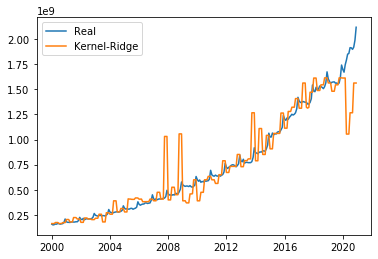

In [37]:
plt.plot(df["Mes"], y)
plt.plot(df["Mes"], krr.predict(X))
plt.legend(["Real", "Kernel-Ridge"])

## K-Neighborhoods Regressor

In [33]:
knr = KNeighborsRegressor()
knr.fit(X=Xt, y = yt)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [51]:
metrics(Xt, yt, knr, "Train")

Metrics of  Train
MSE:  155937588.8407649
MAE:  81389981.88977273


In [56]:
metrics(Xv, yv, knr, "Test")

Metrics of  Test
MSE:  203952834.57043588
MAE:  115656561.36052634


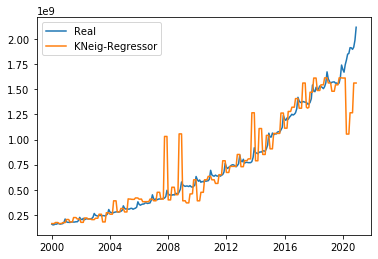

In [38]:
plt.plot(df["Mes"], y)
plt.plot(df["Mes"], knr.predict(X))
plt.legend(["Real","KNeig-Regressor"])

## XGBoost Regressor

In [16]:
xgb = XGBRegressor(n_estimators=100)

xgb.fit(Xt, yt)

[13:59:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/Victor/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [53]:
metrics(Xt, yt, xgb, "Train")

Metrics of  Train
MSE:  38674393.26512273
MAE:  24416195.113636363


In [55]:
metrics(Xv, yv, xgb, "Test")

Metrics of  Test
MSE:  95803676.6385194
MAE:  65588209.421052635


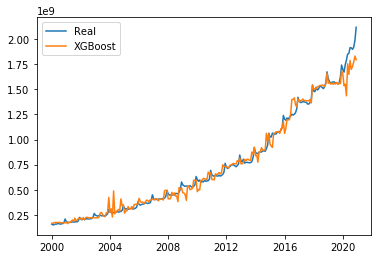

In [39]:
plt.plot(df["Mes"], y)
plt.plot(df["Mes"], xgb.predict(X))
plt.legend(["Real","XGBoost"])

# Conclusions

As you can see, the XGBoost model is fitting better than the other models, the last data from 2020, the proposed model is not getting the pattern, this is very common for atipical months/years like 2020, as you know the pandemic has been generating some macroeconomic changes and historically we do not have some similar period for the model is catching the pattern. Adding more variables to model, some dummies or other that shows some event could help to improve the forecast.